---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Take away
- dummy classifier -> get accuracy score, recall score (Q2)
- plot precision recall curve and a roc curve 
- Gridsearch, cross_val -> GridSearchCV(clf, param_grid = grid_values, scoring = 'recall', cv = 3)

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    data = pd.read_csv("fraud_data.csv", encoding = 'utf-8-sig')   
    return data[data["Class"]==1].shape[0]/data.shape[0] 

answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
data = pd.read_csv("fraud_data.csv", encoding = 'utf-8-sig')   

from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

keep_col = [col for col in df.columns if col not in ["Class"]]

#X = df.iloc[:,:-1]
#y = df.iloc[:,-1]

X = df[keep_col]
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class (most freq.) of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

    # Therefore the dummy 'most_frequent' classifier always predicts class 0
    y_dummy_predictions = dummy_majority.predict(X_test)
 
    return (dummy_majority.score(X_test, y_test), recall_score(y_test, y_dummy_predictions))

answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    clf = SVC().fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    return (clf.score(X_test, y_test), recall_score(y_test, y_predicted), precision_score(y_test, y_predicted))

answer_three()

/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    clf = SVC(C = 1000000000, gamma = 0.0000001).fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    clf_score = clf.decision_function(X_test)

    y_predicted_n = []
    for i, j in list(zip(y_predicted, clf_score)):     
        if j>=-220:
            i = 1
        else:
            i = 0
        y_predicted_n.append(i)

    
    
    return confusion_matrix(y_test, y_predicted_n)

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

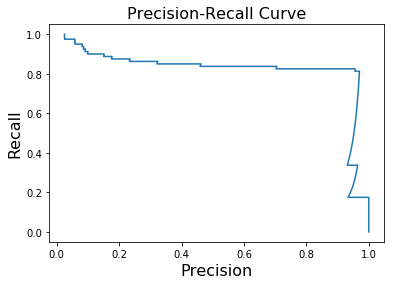

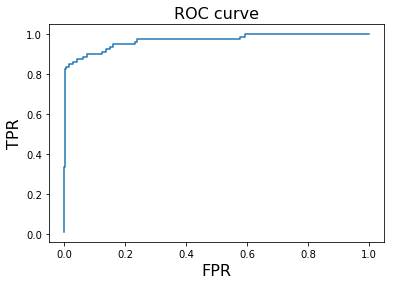

(0.75, 0.9375)

In [7]:
def answer_five():
        
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    import matplotlib.pyplot as plt

    clf = LogisticRegression().fit(X_train, y_train)
    y_score = clf.decision_function(X_test)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)

    precision, recall, threshold = precision_recall_curve(y_test, y_score)
    plt.plot(precision, recall, label = 'Precision-Recall Curve')
    plt.title ("Precision-Recall Curve", fontsize=16)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.show()

    res1 = []
    for i, j in list(zip(precision, recall)):
        if i == 0.75:
            res1.append(float(i))



    #rec = float(recall[np.where(precision==0.75)])
    #tpr = float(tpr_lr[np.where((fpr_lr >= 0.159) & (fpr_lr <= 0.161))][0])



    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label = 'ROC curve')
    plt.title ("ROC curve", fontsize=16)
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16)
    plt.show()

    res2 = []
    for i, j in list(zip(fpr, tpr)):
        if i>=0.159 and i<=0.16:
            res2.append(float(j))


    
    return (res1[0], res2[0])


answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [8]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import cross_val_score

    clf = LogisticRegression()

    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    #grid_values = {'penalty': ['l1'], 'C':[0.01, 0.1, 1, 10, 100]}

    # default metric to optimize over grid parameters: accuracy
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring = 'recall', cv = 3)
    grid_clf_acc.fit(X_train, y_train)
   
    return grid_clf_acc.cv_results_['mean_test_score'].reshape(5,-1)

answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.8115942 ]])

/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<IPython.core.display.Javascript object>


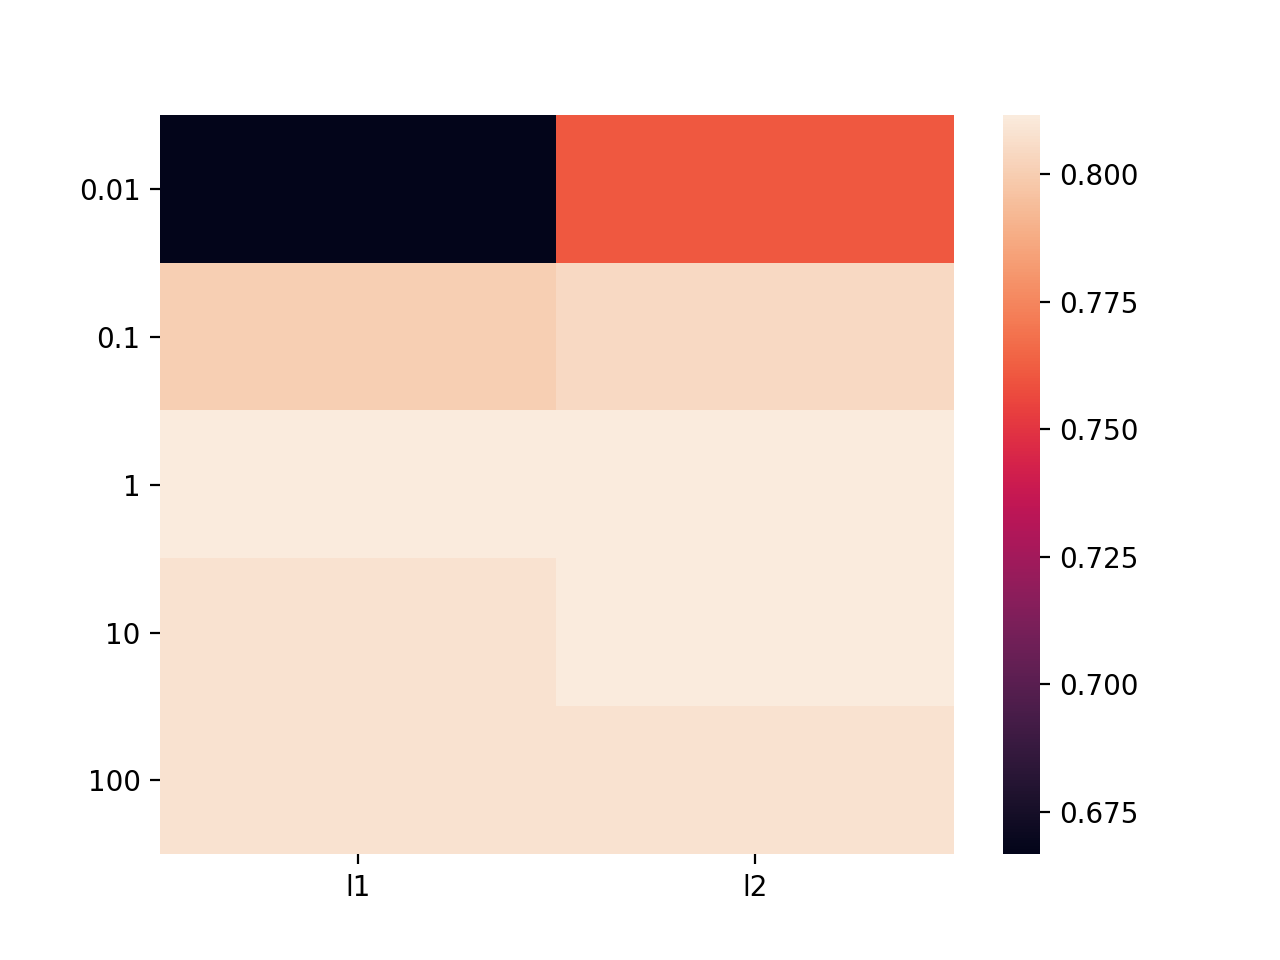

In [9]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())